In [1]:
import sys
import os
os.chdir('../')

import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline

from tools.tools import save,load,lprint,load_config
from tools.bar import BAR

In [2]:
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN

In [3]:
!ls inputs/boermulders.py

inputs/boermulders.py


In [4]:
conf=load_config('inputs/boermulders.py')
conf['resman']=RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 5023

In [5]:
def get_binned_axis(dataframe, axis):
    return np.unique(dataframe[axis])

def create_rounded_variables(dataframe):
    dataframe['rounded_x'] = np.round(dataframe['x'], 2)
    dataframe['rounded_q2'] = np.round(dataframe['Q2'], 2)
    dataframe['rounded_y'] = np.round(dataframe['y'], 2)
    dataframe['rounded_z'] = np.round(dataframe['z'], 2)
    dataframe['rounded_pt'] = np.round(dataframe['pT'], 2)
    
def append_string_axis(dataframe):
    dataframe['axis'] = dataframe['axis'].astype('str')

In [6]:
datasets = {}

for index, data in conf['resman'].sidisres.tabs.iteritems():
    datasets[index] = pd.DataFrame(data) 
    create_rounded_variables(datasets[index])
    append_string_axis(datasets[index])

In [7]:
def get_subset(data, cuts):
    data_subset = data.query(cuts)
    return data_subset

def get_axis(data, axis): 
    return data.loc[data.axis == axis]

In [8]:
datasets.keys()

[5024, 5019, 5020, 5023]

In [9]:
get_binned_axis(datasets[5020], 'rounded_x')

array([ 0.1 ,  0.19])

In [10]:
def plot(data): 
        
    data_sub_x = get_axis(data, 'x')
    data_sub_z = get_axis(data, 'z')
    data_sub_pt = get_axis(data, 'pt')
    
    # options 
    plt.figure(figsize=(16,6))
    plt.rc('font', size=16)
    
    plt.subplot(1, 3, 1)
    plt.errorbar(x=data_sub_x['x'], y=data_sub_x.value, yerr=data_sub_x.alpha, 
                 marker='o', linestyle='', color='red')
    plt.plot(data_sub_x['x'], data_sub_x.thy, linestyle='-', color='red')
   
    plt.axhline(0.0, linestyle='--', color='black', alpha=0.4)
    plt.xlabel('$x_{Bjorken}$')
    plt.ylim([-0.12, 0.12])
    
    plt.subplot(1, 3, 2)
    plt.errorbar(x=data_sub_z['z'], y=data_sub_z.value, yerr=data_sub_z.alpha, 
                 marker='o', linestyle='', color='red')
    plt.plot(data_sub_z['z'], data_sub_z.thy, linestyle='-', color='red')

    plt.axhline(0.0, linestyle='--', color='black', alpha=0.4)
    plt.xlabel('$z_{h}$')
    plt.ylim([-0.12, 0.12])


    plt.subplot(1, 3, 3)
    plt.errorbar(x=data_sub_pt['pT'], y=data_sub_pt.value, yerr=data_sub_pt.alpha, 
                 marker='o', linestyle='', color='red')
    plt.plot(data_sub_pt['pT'], data_sub_pt.thy, linestyle='-', color='red')

    plt.axhline(0.0, linestyle='--', color='black', alpha=0.4)
    plt.xlabel('$P_{T}$')
    plt.ylim([-0.12, 0.12])


    plt.tight_layout()

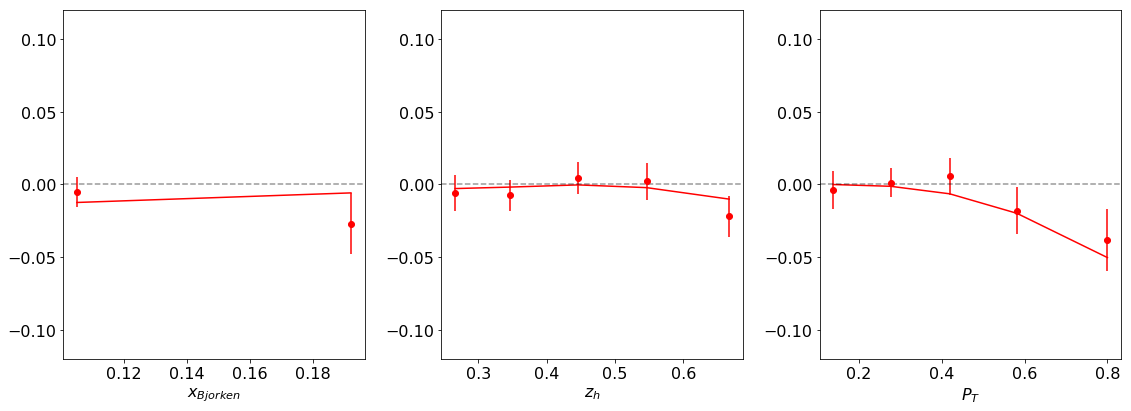

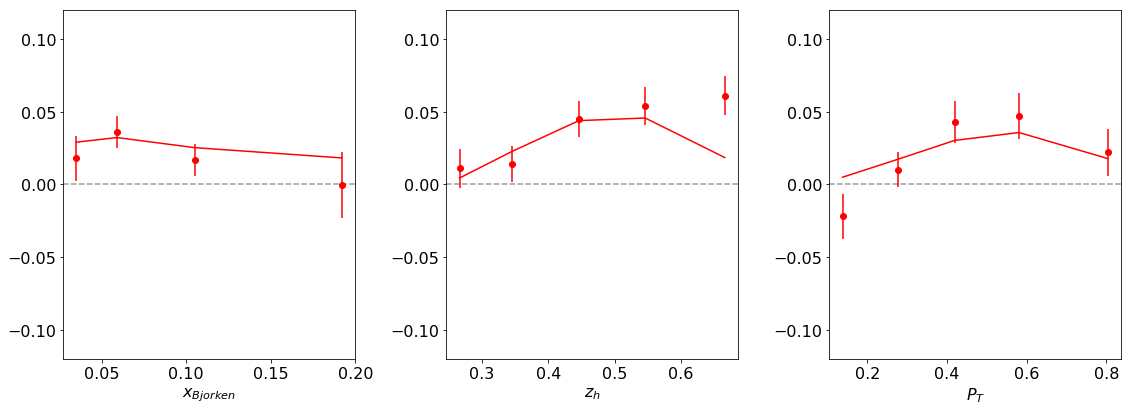

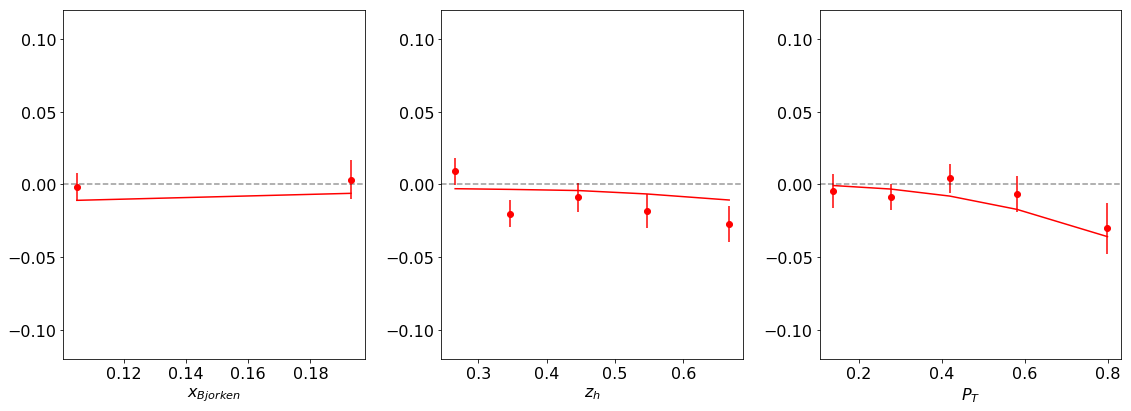

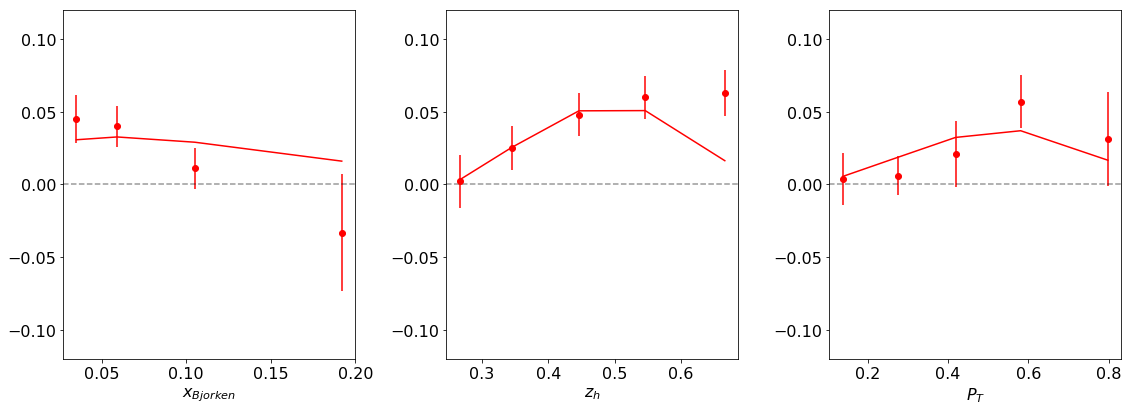

In [11]:
for index, data in datasets.iteritems():
    plot(data)
    
    figure_title = 'summary_plot_%d.pdf' % index
    plt.savefig(figure_title)

In [13]:
def pdf_model(x, n, a, b):
    return n * x**a * (1-x)**b

In [20]:
quarks = ['u', 'd', 's']
x = np.linspace(0.001, 0.999, 100)

In [21]:
pdf_values = {}
parameter_values = {}

for quark in quarks:
    parameter_values[quark] = {}
    parameter_values[quark]['N'] = conf['resman'].conf['params']['boermulders']['%s N' % quark]['value']
    parameter_values[quark]['a'] = conf['resman'].conf['params']['boermulders']['%s a' % quark]['value']
    parameter_values[quark]['b'] = conf['resman'].conf['params']['boermulders']['%s b' % quark]['value']
    
    pdf_values[quark] = pdf_model(x, parameter_values[quark]['N'], 
                                     parameter_values[quark]['a'], 
                                     parameter_values[quark]['b']
                                 )

In [22]:
parameter_values

{'d': {'N': 6.555822986649694,
  'a': 1.6831784109245893,
  'b': 4.564595011923252},
 's': {'N': 9.167352209476142,
  'a': 0.5530709294037828,
  'b': 2.3905071225779015},
 'u': {'N': 1e-05, 'a': 3.5447233385676715, 'b': 1.1416000136172944}}

In [23]:
pdf_values

{'d': array([  5.82248818e-05,   3.18568702e-03,   9.03288749e-03,
          1.65993700e-02,   2.53382340e-02,   3.48650996e-02,
          4.48862670e-02,   5.51681096e-02,   6.55207558e-02,
          7.57881442e-02,   8.58413915e-02,   9.55740694e-02,
          1.04898671e-01,   1.13743864e-01,   1.22052286e-01,
          1.29778739e-01,   1.36888671e-01,   1.43356881e-01,
          1.49166408e-01,   1.54307553e-01,   1.58777018e-01,
          1.62577146e-01,   1.65715234e-01,   1.68202917e-01,
          1.70055618e-01,   1.71292036e-01,   1.71933695e-01,
          1.72004520e-01,   1.71530458e-01,   1.70539127e-01,
          1.69059495e-01,   1.67121588e-01,   1.64756220e-01,
          1.61994748e-01,   1.58868841e-01,   1.55410282e-01,
          1.51650771e-01,   1.47621761e-01,   1.43354294e-01,
          1.38878867e-01,   1.34225300e-01,   1.29422620e-01,
          1.24498963e-01,   1.19481480e-01,   1.14396257e-01,
          1.09268247e-01,   1.04121207e-01,   9.89776516e-02,
   

In [24]:
def make_x_plot():
    plt.figure(figsize=(12,10))
    
    for index, quark in enumerate(quarks):
        plt.subplot(len(quarks), 2, index+1)
        
        plt.plot(x, pdf_values[quark])
        plt.title('quark flavor: %s' % quark)
        plt.xlabel('$x$')
    
    plt.tight_layout()

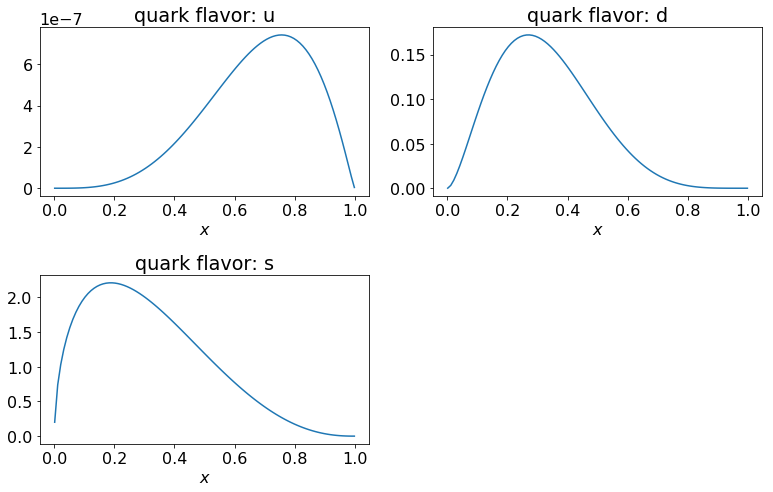

In [25]:
make_x_plot()
plt.savefig('/Users/davidriser/Documents/pdf_x.pdf')